In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 46
idxLength = 28
idxGain = 29

In [34]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

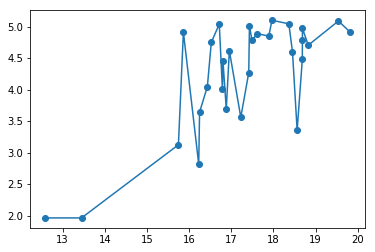

[1.       1.963221 1.963221 3.123572 4.911207 2.815018 3.6414   4.046815
 4.748364 5.038985 4.00386  4.458663 3.692385 4.616998 3.55999  4.267475
 5.013472 4.780747 4.887591 4.847821 5.099599 5.042947 4.598484 3.354443
 4.479768 4.785932 4.968794 4.704183 5.087199 4.917212]
[-1.      12.5906  13.44771 15.74576 15.86387 16.2278  16.2479  16.43274
 16.52599 16.71523 16.78955 16.80207 16.88137 16.95447 17.22557 17.41458
 17.43111 17.49076 17.61624 17.89058 17.96465 18.36546 18.45199 18.5626
 18.68564 18.68737 18.68846 18.82675 19.54197 19.81148]
Optimal lenght:  4.902864666666666


In [35]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)